In [12]:
import pandas as pd #import pandas 

In [13]:
df= pd.read_csv('housepricedata.csv') #load out data 

In [14]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [15]:
#convert data into array for machine to process 

dataset= df.values  #store the values of df into variable "dataset"

In [16]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [17]:
#split our data into  features x: assign first 10 array to x  and prediction y assign the lat array

x=dataset[:,0:10]
y=dataset[:,10]

In [18]:
#make sure the scale features of input data are the same

from sklearn import preprocessing
#create a function to scale input data to lie between 0 and 1 
min_max_scalar = preprocessing.MinMaxScaler()
X_scale= min_max_scalar.fit_transform(x)

In [19]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [20]:
#split our dataset into train, dev, and test

from sklearn.model_selection import train_test_split


In [21]:
#val_and_test size will be 30% of the overall dataset

X_train, X_val_and_test, Y_train, Y_val_and_test= train_test_split(X_scale, y, test_size=0.3) 

In [22]:
#separate validation set and test set

X_val, X_test, Y_val, Y_test= train_test_split(X_val_and_test,Y_val_and_test, test_size=0.5)

In [23]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [36]:
#setting up an architecture using keras 
from keras.models import Sequential
from keras.layers import Dense


In [42]:
#specify activation function, input X ..
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1,  activation='sigmoid'),
])

In [43]:
#specify the algorithm to use for optimization sgd (stochastic gradient descent),
#loss function(loss function for outputs that take the values 1 or 0 is called binary cross entropy.),
#other metrics

model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [44]:
#train data
#specify the data we are training on 

hist=model.fit(X_train, Y_train, 
               batch_size=32, epochs=100,
              validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 282us/step - loss: 0.6902 - accuracy: 0.5900 - val_loss: 0.6907 - val_accuracy: 0.5479
Epoch 2/100
1022/1022 [==============================] - 0s 53us/step - loss: 0.6843 - accuracy: 0.6683 - val_loss: 0.6859 - val_accuracy: 0.6027
Epoch 3/100
1022/1022 [==============================] - 0s 55us/step - loss: 0.6796 - accuracy: 0.7074 - val_loss: 0.6822 - val_accuracy: 0.6484
Epoch 4/100
1022/1022 [==============================] - 0s 61us/step - loss: 0.6758 - accuracy: 0.7172 - val_loss: 0.6791 - val_accuracy: 0.6667
Epoch 5/100
1022/1022 [==============================] - 0s 48us/step - loss: 0.6725 - accuracy: 0.7661 - val_loss: 0.6765 - val_accuracy: 0.6575
Epoch 6/100
1022/1022 [==============================] - 0s 68us/step - loss: 0.6692 - accuracy: 0.7436 - val_loss: 0.6736 - val_accuracy: 0.6530
Epoch 7/100
1022/1022 [==============================] - 0s 63us/step - loss

1022/1022 [==============================] - 0s 63us/step - loss: 0.3719 - accuracy: 0.8620 - val_loss: 0.3626 - val_accuracy: 0.8356
Epoch 57/100
1022/1022 [==============================] - 0s 58us/step - loss: 0.3681 - accuracy: 0.8591 - val_loss: 0.3549 - val_accuracy: 0.8447
Epoch 58/100
1022/1022 [==============================] - 0s 51us/step - loss: 0.3641 - accuracy: 0.8620 - val_loss: 0.3484 - val_accuracy: 0.8584
Epoch 59/100
1022/1022 [==============================] - 0s 55us/step - loss: 0.3611 - accuracy: 0.8640 - val_loss: 0.3461 - val_accuracy: 0.8539
Epoch 60/100
1022/1022 [==============================] - 0s 53us/step - loss: 0.3577 - accuracy: 0.8630 - val_loss: 0.3453 - val_accuracy: 0.8539
Epoch 61/100
1022/1022 [==============================] - 0s 56us/step - loss: 0.3547 - accuracy: 0.8620 - val_loss: 0.3382 - val_accuracy: 0.8630
Epoch 62/100
1022/1022 [==============================] - 0s 48us/step - loss: 0.3514 - accuracy: 0.8669 - val_loss: 0.3359 - val_a

In [45]:
#evaluate the accuracy of test set 
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 63us/step


0.913241982460022

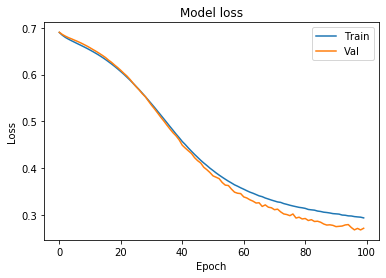

In [54]:
#Visualizing Loss and Accuracy
#loss train and validation

import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()







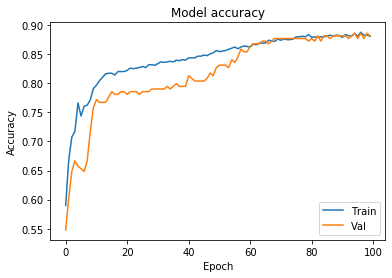

In [55]:

#accuracy train and validation 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()